# Large Scale Fish Dataset


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Bluefin-big.jpg/640px-Bluefin-big.jpg">

Bu projemizde Baliklari CNN ve Transfer Learning(VGG16) kullanarak sınıflandıracağız 

<a href="https://www.kaggle.com/datasets/crowww/a-large-scale-fish-dataset?select=Fish_Dataset">Dataya Buradan Erişebilirsiniz</a>

In [1]:
import cv2
import pandas as pd
import os

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
os.listdir("Fish_Dataset")

['Black Sea Sprat',
 'Gilt-Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout']

In [3]:
img_path="Fish_Dataset/"
labels=os.listdir("Fish_Dataset")

In [4]:
#Dosyadan Resim okuma
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):       #Klasörün içindeki alt klasörleri söyler
        img_list.append(img_path+label+"/"+img_file)  #apppend dizinin sonuna eklme yapıyor
        label_list.append(label)

In [5]:
df=pd.DataFrame({"img":img_list,"label":label_list})

In [6]:
df.sample(3)

,img,label
7269,Fish_Dataset/Striped Red Mullet/00270.png,Striped Red Mullet
3544,Fish_Dataset/Red Mullet/00545.png,Red Mullet
980,Fish_Dataset/Black Sea Sprat/00981.png,Black Sea Sprat


In [7]:
df.shape

(9000, 2)

In [8]:
d={'Black Sea Sprat':0,
 'Gilt-Head Bream':1,
 'Hourse Mackerel':2,
 'Red Mullet':3,
 'Red Sea Bream':4,
 'Sea Bass':5,
 'Shrimp':6,
 'Striped Red Mullet':7,
 'Trout':8}

In [9]:
df["encode_label"]=df["label"].map(d)

In [10]:
df.sample(5)

,img,label,encode_label
2586,Fish_Dataset/Hourse Mackerel/00587.png,Hourse Mackerel,2
5104,Fish_Dataset/Sea Bass/00105.png,Sea Bass,5
7037,Fish_Dataset/Striped Red Mullet/00038.png,Striped Red Mullet,7
3002,Fish_Dataset/Red Mullet/00003.png,Red Mullet,3
3327,Fish_Dataset/Red Mullet/00328.png,Red Mullet,3


In [11]:
x=[]
for img in df["img"]:
    img=cv2.imread(img)
    img=cv2.resize(img,(70,70))
    img=img/255
    x.append(img)

In [12]:
x=np.array(x)

In [13]:
y=df["encode_label"]

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape

In [16]:
model=Sequential()
model.add(Input(shape=(70,70,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25)) # Burada 'rate' parametresini belirtiyoruz
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128))
model.add(Dense(9, activation='softmax')) 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15,verbose=1)

Epoch 1/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.6011 - loss: 3.7647 - val_accuracy: 0.1556 - val_loss: 25.2909
Epoch 2/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.8964 - loss: 0.7560 - val_accuracy: 0.3967 - val_loss: 14.7950
Epoch 3/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.9369 - loss: 0.3885 - val_accuracy: 0.7406 - val_loss: 2.5784
Epoch 4/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.9470 - loss: 0.3044 - val_accuracy: 0.6928 - val_loss: 4.3718
Epoch 5/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9587 - loss: 0.2202 - val_accuracy: 0.3583 - val_loss: 19.0156
Epoch 6/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9560 - loss: 0.2385 - val_accuracy: 0.9006 - val_loss: 0.7425
Epoch 7/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.9620 - loss: 0.2145 - val_accuracy: 0.9250 - val_loss: 0.5491
Epoch 8/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.9706 - loss: 0.1451 -

In [18]:
def yb(img):
    img=cv2.imread(img)
    img=cv2.resize(img,(70,70))
    img=img/255
    img=np.expand_dims(img,axis=0)  # Modelin boyutunu arttırıyor
    return img

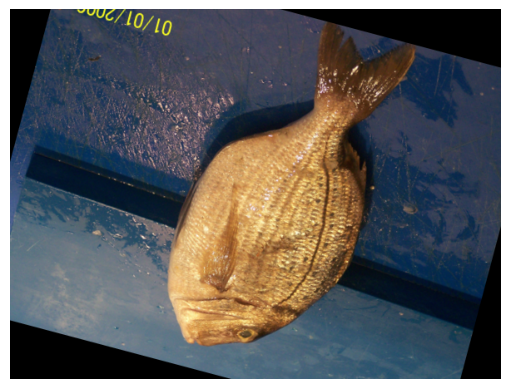

In [19]:
image_path = "Fish_Dataset/Red Sea Bream/00409.png"  # Görüntü dosyasının yolu
img = cv2.imread(image_path)  # Görüntüyü yükleme
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV, görüntüyü BGR formatında yükler; RGB'ye dönüştürelim
plt.imshow(img)# Görüntüyü gösterme
plt.axis('off')  # Eksenleri gizleme
plt.show()

In [20]:
image=yb("Fish_Dataset/Red Sea Bream/00409.png")

In [21]:
prediction=model.predict(image)
predicted_class=np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


In [22]:
predicted_class

4

In [23]:
# {'Black Sea Sprat':0,
# 'Gilt-Head Bream':1,
# 'Hourse Mackerel':2,
# 'Red Mullet':3,
# 'Red Sea Bream':4,
# 'Sea Bass':5,
# 'Shrimp':6,
# 'Striped Red Mullet':7,
# 'Trout':8}

In [24]:
model.save("balik.h5")

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape
from tensorflow.keras.applications import VGG16, ResNet50,Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Tek satırda resimlerin tamamını okumaya yarıyor

### VGG16 ile

In [27]:
data_dir="Fish_Dataset"
img_width,img_height=224, 224

train_datagen=ImageDataGenerator(rescale=1/255, validation_split=0.20)

train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode="sparse", subset="training")

test_datagen=ImageDataGenerator( rescale=1/255)
test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode="sparse", subset="validation")

base_model=VGG16(weights="imagenet", input_shape=(img_width,img_height,3),include_top=False)
model=Sequential()

model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False
,
Flatten())
model.add(Dense(1024,activation="relu")) # Dense nöronları birbirine bağlar
model.add(Dense(9,activation="softmax"))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_datagenerator,epochs=10,validation_data=test_datagenerator)

Found 7200 images belonging to 9 classes.
Found 1800 images belonging to 9 classes.
Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 488s 2s/step - accuracy: 0.6723 - loss: 2.8220 - val_accuracy: 0.8822 - val_loss: 0.3396
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 471s 2s/step - accuracy: 0.9968 - loss: 0.0240 - val_accuracy: 0.9294 - val_loss: 0.2074
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 473s 2s/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.9633 - val_loss: 0.1084
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 475s 2s/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.9667 - val_loss: 0.1008
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 474s 2s/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9644 - val_loss: 0.1022
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 474s 2s/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9628 - val_loss: 0.1040
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 475s 2s/step - accuracy: 1.0000 - loss: 7.9615e-04 - val_accuracy: 0.9622 - val_loss: 0.1075
Epoch 8/1

In [28]:
model.save("balik_mod.h5")

Sonuc olarak ilk modelden 97% ikinci modelden 98% accuracy aldık

In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           9,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,815,773 (350.25 MB)

 Trainable params: 25,700,361 (98.04 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 51,400,724 (196.08 MB)